In [7]:
import matplotlib.pyplot as plt
import numpy as np
from kwave.data import Vector
from kwave.kgrid import kWaveGrid
from kwave.kmedium import kWaveMedium
from kwave.kspaceFirstOrder2D import kspaceFirstOrder2D
from kwave.ksensor import kSensor
from kwave.ksource import kSource
from kwave.ktransducer import kWaveTransducerSimple, NotATransducer
from kwave.kWaveSimulation import SimulationOptions

from kwave.options.simulation_execution_options import SimulationExecutionOptions
from kwave.utils.mapgen import make_arc, make_circle, make_disc
from kwave.utils.dotdictionary import dotdict
from kwave.utils.filters import spect
from kwave.utils.plot import voxel_plot
from kwave.utils.signals import reorder_sensor_data, tone_burst


In [37]:
# create the computational grid
Nx = 128           # number of grid points in the x (row) direction
Ny = 128           # number of grid points in the y (column) direction
dx = 0.1e-3        # grid point spacing in the x direction [m]
dy = 0.1e-3        # grid point spacing in the y direction [m]
kgrid = kWaveGrid([Nx, Ny], [dx, dy])

# define the properties of the propagation medium
medium = kWaveMedium(sound_speed = 1500, alpha_coeff = 0.75, alpha_power = 1.5)

# create initial pressure distribution using make_disc
disc_magnitude = 5 # [Pa]
disc_x_pos = 50    # [grid points]
disc_y_pos = 50    # [grid points]
disc_radius = 8    # [grid points]
disc_1 = disc_magnitude * make_disc(Vector([Nx, Ny]), Vector([disc_x_pos, disc_y_pos]), disc_radius)

disc_magnitude = 3 # [Pa]
disc_x_pos = 80    # [grid points]
disc_y_pos = 60    # [grid points]
disc_radius = 5    # [grid points]
disc_2 = disc_magnitude* make_disc(Vector([Nx, Ny]), Vector([disc_x_pos, disc_y_pos]), disc_radius);

source = kSource()
source.p0 = disc_1 + disc_2

# define a binary sensor mask
sensor_x_pos = Nx/2;          # [grid points]
sensor_y_pos = Ny/2;          # [grid points]
sensor_radius = Nx/2 - 22;    # [grid points]
sensor_arc_angle = 3* np.pi/2 # [radians]

sensor = kSensor()
sensor.mask = make_circle(Vector([Nx, Ny]), Vector([sensor_x_pos, sensor_y_pos]), sensor_radius, sensor_arc_angle)

simulation_options = SimulationOptions(
    save_to_disk=True,
    data_cast='single',
)
execution_options = SimulationExecutionOptions(is_gpu_simulation=True)

# run the simulation
sensor_data = kspaceFirstOrder2D(kgrid, source, sensor, medium, simulation_options, execution_options)

# reorder the simulation data
sensor_data_reordered = reorder_sensor_data(kgrid, sensor, sensor_data['p'])


CalledProcessError: Command 'set OMP_PLACES=cores &  set OMP_PROC_BIND=SPREAD &  C:\Users\gordo\miniconda3\Lib\site-packages\kwave\bin\windows\kspaceFirstOrder-CUDA.exe -i C:\Users\gordo\AppData\Local\Temp\01-May-2024-21-12-20_kwave_output.h5 -o C:\Users\gordo\AppData\Local\Temp\01-May-2024-21-12-20_kwave_input.h5  --p_raw -s 1' returned non-zero exit status 3221225539.

In [ ]:
sensor_data.keys()

dict_keys(['Nt', 'Nx', 'Ny', 'Nz', 'absorbing_flag', 'axisymmetric_flag', 'c_ref', 'dt', 'dx', 'dy', 'nonlinear_flag', 'nonuniform_grid_flag', 'p', 'p0_source_flag', 'p_source_flag', 'pml_x_alpha', 'pml_x_size', 'pml_y_alpha', 'pml_y_size', 't_index', 'transducer_source_flag', 'ux_source_flag', 'uy_source_flag'])

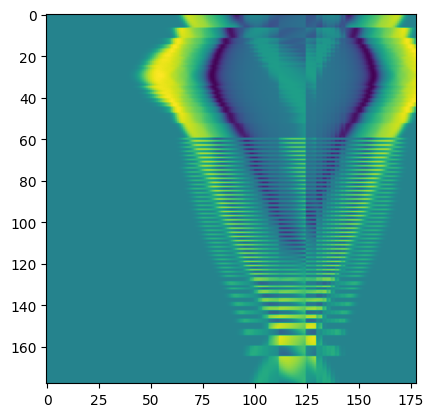

In [36]:
plt.imshow(sensor_data_reordered.T)